In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('preprocess1.csv')

In [4]:
df.head()

,Airline,Source,Destination,Flight_Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,Price
0,IndiGo,Banglore,New Delhi,170,0,No info,24,3,2019,3897
1,Air India,Kolkata,Banglore,445,2,No info,1,5,2019,7662
2,Jet Airways,Delhi,Cochin,1140,2,No info,9,6,2019,13882
3,IndiGo,Kolkata,Banglore,325,1,No info,12,5,2019,6218
4,IndiGo,Banglore,New Delhi,285,1,No info,1,3,2019,13302


In [5]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 10681
Number of columns: 10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10681 non-null  object
 1   Source            10681 non-null  object
 2   Destination       10681 non-null  object
 3   Flight_Duration   10681 non-null  int64 
 4   Total_Stops       10681 non-null  int64 
 5   Additional_Info   10681 non-null  object
 6   Day_of_Journey    10681 non-null  int64 
 7   Month_of_Journey  10681 non-null  int64 
 8   Year_of_Journey   10681 non-null  int64 
 9   Price             10681 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 834.6+ KB


In [7]:
df.describe()

,Flight_Duration,Total_Stops,Day_of_Journey,Month_of_Journey,Year_of_Journey,Price
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.0,10681.000000
mean,642.907031,0.824080,13.508379,4.708735,2019.0,9087.063290
std,507.718467,0.675164,8.479450,1.164345,0.0,4611.738196
min,5.000000,0.000000,1.000000,3.000000,2019.0,1759.000000
25%,170.000000,0.000000,6.000000,3.000000,2019.0,5277.000000
50%,520.000000,1.000000,12.000000,5.000000,2019.0,8372.000000
75%,930.000000,1.000000,21.000000,6.000000,2019.0,12373.000000
max,2860.000000,4.000000,27.000000,6.000000,2019.0,79512.000000


In [8]:
## dependent and independent data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
## identifying the categorical and numerical columns 
cat_feat = [feature for feature in X.columns if X[feature].dtypes == 'O' ]
cat_feat

['Airline', 'Source', 'Destination', 'Additional_Info']

In [10]:
## identifying the numerical columns
num_feat = [feature for feature in X.columns if feature not in cat_feat]
num_feat

['Flight_Duration',
 'Total_Stops',
 'Day_of_Journey',
 'Month_of_Journey',
 'Year_of_Journey']

In [11]:
## dropping the duplicate rows
X.drop_duplicates(inplace=True)

In [12]:
## finding the number of unique values in each of the categorical columns
for feature in cat_feat:
    print(f"{feature}:")
    print(X[feature].value_counts())
    print("\n")

Airline:
Jet Airways                          3221
Air India                            1541
IndiGo                               1183
Multiple carriers                     922
SpiceJet                              693
Vistara                               412
Air Asia                              269
GoAir                                 178
Multiple carriers Premium economy      11
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Source:
Delhi       3881
Kolkata     2494
Banglore    1429
Mumbai       393
Chennai      243
Name: Source, dtype: int64


Destination:
Cochin       3881
Banglore     2494
Delhi         747
New Delhi     682
Hyderabad     393
Kolkata       243
Name: Destination, dtype: int64


Additional_Info:
No info                         6433
In-flight meal not included     1709
No check-in baggage included     262
1 Long layover                    19
Change airports

In [13]:
## In Additional_Info column, No info value is mispelled as No Info 3 times. We will need to correct it
X['Additional_Info'] = np.where(X['Additional_Info'] == "No Info", "No info", X['Additional_Info'])

In [14]:
X['Additional_Info'].value_counts()

No info                         6436
In-flight meal not included     1709
No check-in baggage included     262
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [15]:
X.columns

Index(['Airline', 'Source', 'Destination', 'Flight_Duration', 'Total_Stops',
       'Additional_Info', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey'],
      dtype='object')

In [16]:
df_copy = df.copy()
for feature in cat_feat:
    lst = df_copy[feature].unique()
    d = dict()
    for key, value in enumerate(lst):
        d[value] = key + 1
    df_copy[feature] = df_copy[feature].map(d)

In [17]:
df_copy.head()

,Airline,Source,Destination,Flight_Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,Price
0,1,1,1,170,0,1,24,3,2019,3897
1,2,2,2,445,2,1,1,5,2019,7662
2,3,3,3,1140,2,1,9,6,2019,13882
3,1,2,2,325,1,1,12,5,2019,6218
4,1,1,1,285,1,1,1,3,2019,13302


<AxesSubplot:>

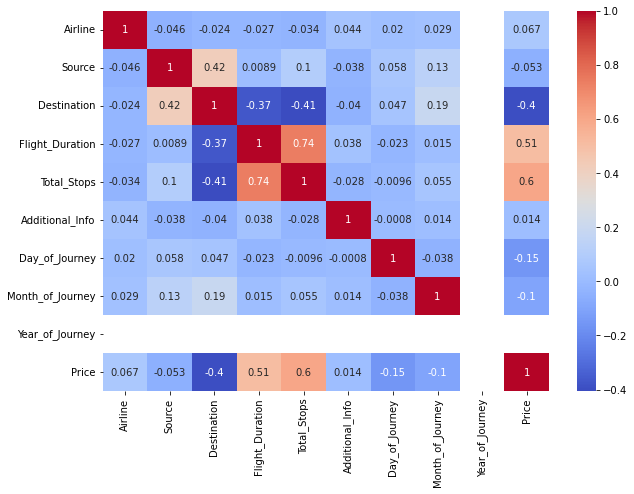

In [18]:
## checking the multi-collinerity of the features
plt.figure(figsize = (10,7))
sns.heatmap(df_copy.corr(),cmap="coolwarm",annot=True)

**Here no two independent features have a correlation greater than 0.8 and lower than -0.8. So there is very little chance of multicollinearity**

**Also the feature Year_of_Journey doesn't contribute even a percent to the price prediction. Most probably this column have zero variance. Let's check**

In [19]:
## checking the variance of numerical columns
for feature in num_feat:
    print(f"Variance of the numerical feature {feature}: {np.round((df[feature].std())**2,3)}")

Variance of the numerical feature Flight_Duration: 257778.042
Variance of the numerical feature Total_Stops: 0.456
Variance of the numerical feature Day_of_Journey: 71.901
Variance of the numerical feature Month_of_Journey: 1.356
Variance of the numerical feature Year_of_Journey: 0.0


In [20]:
## Since the feature Year_of_Journey have zero variance, we will have to remove it
X.drop(columns = ['Year_of_Journey'],inplace=True)

In [21]:
X.head()

,Airline,Source,Destination,Flight_Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,170,0,No info,24,3
1,Air India,Kolkata,Banglore,445,2,No info,1,5
2,Jet Airways,Delhi,Cochin,1140,2,No info,9,6
3,IndiGo,Kolkata,Banglore,325,1,No info,12,5
4,IndiGo,Banglore,New Delhi,285,1,No info,1,3


In [22]:
## checking for the missing values in the columns of the data
for feature in df.columns:
    print(f"The number of missing values in the feature column {feature}: {df[feature].isnull().sum()}")

The number of missing values in the feature column Airline: 0
The number of missing values in the feature column Source: 0
The number of missing values in the feature column Destination: 0
The number of missing values in the feature column Flight_Duration: 0
The number of missing values in the feature column Total_Stops: 0
The number of missing values in the feature column Additional_Info: 0
The number of missing values in the feature column Day_of_Journey: 0
The number of missing values in the feature column Month_of_Journey: 0
The number of missing values in the feature column Year_of_Journey: 0
The number of missing values in the feature column Price: 0


The number of missing values in the Flight_Duration column: 0


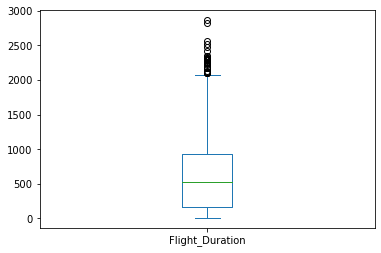

In [23]:
## checking if the feature columns have outliers or not
df['Flight_Duration'].plot(kind="box")
print(f"The number of missing values in the Flight_Duration column: {df['Flight_Duration'].isnull().sum()}")

**Data seems to have some outliers in the Flight_Duration feature column**

In [24]:
## converting the outliers in the Flight_Duration column into the null values 
## and then filling those values with the mean of non-null date

Q1 = df['Flight_Duration'].quantile(0.25)
Q3 = df['Flight_Duration'].quantile(0.75)
IQR = Q3 - Q1

df['Flight_Duration'] = np.where(df['Flight_Duration']> (Q3 + 1.45*IQR) , np.nan, df['Flight_Duration'])

<AxesSubplot:>

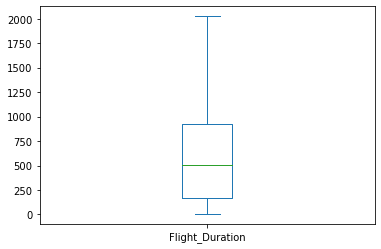

In [25]:
## now again checking for the outliers
df['Flight_Duration'].plot(kind="box")

In [26]:
## checking for  the missing values in the Flight_Duration dataset
df['Flight_Duration'].isnull().sum()

81

In [27]:
## replacing the missing values with the mean of the non-null values
df['Flight_Duration'].fillna(df['Flight_Duration'].mean(),inplace=True)

In [28]:
df['Flight_Duration'].isnull().sum()

0

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_Duration', ylabel='Density'>

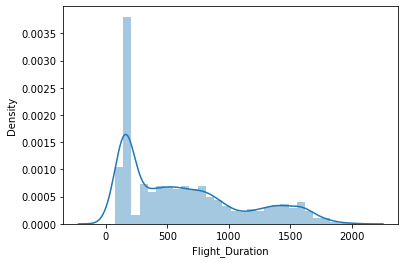

In [29]:
sns.distplot(df['Flight_Duration'])

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_Duration', ylabel='Density'>

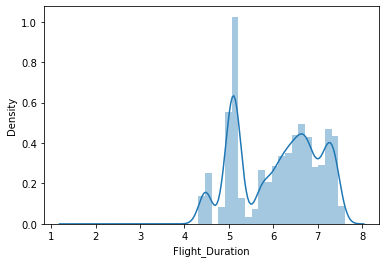

In [30]:
sns.distplot(np.log(df['Flight_Duration']))

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_Duration', ylabel='Density'>

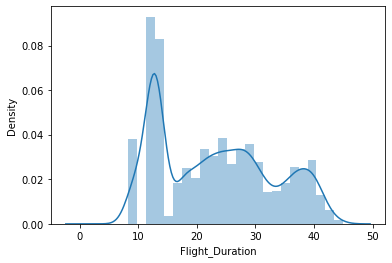

In [31]:
sns.distplot(np.sqrt(df['Flight_Duration']))